# WeatherPy
----

### 3 Observable Trends:
* 1) There is a clear correlation between a city’s temperature and its latitudinal location.  We know that a latitude of zero is located directly at the equator, and because the equator receives more direct sunlight than latitudes far away from the equator, the equator is generally warmer.  The temperature vs latitude graph visually shows that the warmest temperatures for the cities selected occur directly at or very near the latitude of zero.  Also, the coolest temperatures are experienced at latitudes furthest away from equator.  This validates our assumption that warmest temps occur at the equator and coolest temps occur furthest away from the equator.
* 2) As far as the relationship between varying latitudes and the wind speeds they experience, there doesn’t seem to be a strong correlation between the two.  However, what is clear, is that the frequency of above-average wind speeds recorded does increase the further away from the equator you go.  These larger wind speed outliers are recorded in locations that are furthest from the equator in this sample.
* 3) As far as the relationship between latitude and humidity, there is no clear and obvious correlation upon initial observation, but, given more focus, it is apparent that humidity is more or less evenly distributed for locations with latitudes greater than zero.  But, with locations with latitudes less than zero, it appears humidity is skewed towards being a higher percentage and most likely above the global average.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

city_names = []
city_ids = []
countries = []
wind_speeds = []
latitudes = []
longitudes = []
clouds = []
humidities = []
weather_descriptions = []
max_temps = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

748

In [3]:
year = time.localtime()[0]
month = time.localtime()[1]
day = time.localtime()[2]
hour = time.localtime()[3]
minute = time.localtime()[4]

time_now = f"{hour}:{minute}, {month}/{day}/{year}"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
for city in cities:
        response = requests.get(query_url + city).json()
        
        if response["cod"] == 200:
            city_names.append(response["name"])
            city_ids.append(response["id"])
            countries.append(response["sys"]["country"])
            wind_speeds.append(response["wind"]["speed"])
            latitudes.append(response["coord"]["lat"])
            longitudes.append(response["coord"]["lon"])
            clouds.append(response["clouds"]["all"])
            humidities.append(response["main"]["humidity"])
            weather_descriptions.append(response["weather"][0]["description"])
            max_temps.append(response["main"]["temp_max"])

            city_name = city_names[-1]
            city_id = city_ids[-1]
            country = countries[-1]
            rest_message = "Successfully Retrieved"

            message = (f"...... {city_name}, {country} (ID:{city_id}): {rest_message}")
            for m in message:
                if message.index(m) <= 6:
                    sys.stdout.write(m)
                    sys.stdout.flush()
                    time.sleep(0.3)
                else:
                    print(message[7:])
                    time.sleep(0.08)
                    break

print("")
print(f"Weather Data Retrieved for {len(city_names)} Cities - Requested: {time_now}")

...... Upernavik, GL (ID:3418910): Successfully Retrieved
...... Busselton, AU (ID:2075265): Successfully Retrieved
...... Bluff, AU (ID:2175403): Successfully Retrieved
...... Dukat, RS (ID:786562): Successfully Retrieved
...... Springfield, US (ID:4409896): Successfully Retrieved
...... Butaritari, KI (ID:2110227): Successfully Retrieved
...... Ushuaia, AR (ID:3833367): Successfully Retrieved
...... Christchurch, NZ (ID:2192362): Successfully Retrieved
...... Ostrovnoy, RU (ID:556268): Successfully Retrieved
...... Nuuk, GL (ID:3421319): Successfully Retrieved
...... Vila, IT (ID:3164565): Successfully Retrieved
...... Semirom, IR (ID:116406): Successfully Retrieved
...... Ust-Tarka, RU (ID:1488074): Successfully Retrieved
...... Puerto Ayora, EC (ID:3652764): Successfully Retrieved
...... Batagay, RU (ID:2027044): Successfully Retrieved
...... Vila Velha, BR (ID:6320062): Successfully Retrieved
...... Cayenne, GF (ID:3382160): Successfully Retrieved
...... Kruisfontein, ZA (ID:98671

...... Marawi, PH (ID:1701054): Successfully Retrieved
...... Saldanha, PT (ID:2737599): Successfully Retrieved
...... Divnomorskoye, RU (ID:566157): Successfully Retrieved
...... Batemans Bay, AU (ID:2176639): Successfully Retrieved
...... Oistins, BB (ID:3373652): Successfully Retrieved
...... Thompson, CA (ID:6165406): Successfully Retrieved
...... Kununurra, AU (ID:2068110): Successfully Retrieved
...... Fortuna, ES (ID:2517679): Successfully Retrieved
...... Sambava, MG (ID:1056899): Successfully Retrieved
...... Boa Vista, BR (ID:3664980): Successfully Retrieved
...... Xingyi, CN (ID:1787599): Successfully Retrieved
...... San Vicente, SV (ID:3583178): Successfully Retrieved
...... Plouzane, FR (ID:2986626): Successfully Retrieved
...... Talnakh, RU (ID:1490256): Successfully Retrieved
...... Kirkenaer, NO (ID:3150261): Successfully Retrieved
...... Orbetello, IT (ID:3171985): Successfully Retrieved
...... Ancud, CL (ID:3899695): Successfully Retrieved
...... Antigonish, CA (ID:5

...... Cap Malheureux, MU (ID:934649): Successfully Retrieved
...... Katsuura, JP (ID:1865309): Successfully Retrieved
...... Beatrice, US (ID:5063646): Successfully Retrieved
...... Batagay-Alyta, RU (ID:2027042): Successfully Retrieved
...... Nagykata, HU (ID:3047669): Successfully Retrieved
...... Khorramshahr, IR (ID:127319): Successfully Retrieved
...... Nkayi, CG (ID:2259383): Successfully Retrieved
...... Charters Towers, AU (ID:2171722): Successfully Retrieved
...... Parabel, RU (ID:1495586): Successfully Retrieved
...... Pokhara, NP (ID:1282898): Successfully Retrieved
...... Lagoa, PT (ID:2267254): Successfully Retrieved
...... Saint-Pierre, FR (ID:2995603): Successfully Retrieved
...... Sucre, BO (ID:3903987): Successfully Retrieved
...... Chifeng, CN (ID:2038067): Successfully Retrieved
...... Sitka, US (ID:4267710): Successfully Retrieved
...... Puerto del Rosario, ES (ID:2512186): Successfully Retrieved
...... Rio Gallegos, AR (ID:3838859): Successfully Retrieved
...... G

...... Scarborough, GB (ID:2638419): Successfully Retrieved
...... Ostersund, SE (ID:2685750): Successfully Retrieved
...... Tshane, BW (ID:933726): Successfully Retrieved
...... Santa Isabel, CO (ID:3668716): Successfully Retrieved
...... Fremont, US (ID:5350734): Successfully Retrieved
...... Tottori, JP (ID:1849892): Successfully Retrieved
...... Progreso, UY (ID:3440963): Successfully Retrieved
...... Ibra, OM (ID:287832): Successfully Retrieved
...... Rio Grande, BR (ID:3451138): Successfully Retrieved
...... Teya, MX (ID:3526662): Successfully Retrieved
...... Zonguldak, TR (ID:737021): Successfully Retrieved
...... Pitimbu, BR (ID:3391889): Successfully Retrieved
...... Mandiana, GN (ID:2417795): Successfully Retrieved
...... Kidal, ML (ID:2455290): Successfully Retrieved
...... Inhambane, MZ (ID:1045114): Successfully Retrieved
...... Saryagash, KZ (ID:1512934): Successfully Retrieved
...... Port Moresby, PG (ID:2088122): Successfully Retrieved
...... Jiaohe, CN (ID:2036536): S

...... Young, UY (ID:3439525): Successfully Retrieved
...... Namatanai, PG (ID:2090021): Successfully Retrieved
...... Stodolishche, RU (ID:487464): Successfully Retrieved
...... Marystown, CA (ID:6067472): Successfully Retrieved
...... Nizhnevartovsk, RU (ID:1497543): Successfully Retrieved
...... Margate, AU (ID:2158744): Successfully Retrieved
...... Labuhan, ID (ID:1641899): Successfully Retrieved
...... Aberdeen, US (ID:5225857): Successfully Retrieved
...... Along, IN (ID:1278969): Successfully Retrieved
...... Puerto Cabezas, NI (ID:3617154): Successfully Retrieved
...... Americo Brasiliense, BR (ID:3472338): Successfully Retrieved
...... Vukovar, HR (ID:3187047): Successfully Retrieved
...... Ouango, CD (ID:236844): Successfully Retrieved
...... Middlebury, US (ID:5238499): Successfully Retrieved
...... Ilhabela, BR (ID:3461425): Successfully Retrieved
...... Lompoc, US (ID:5367788): Successfully Retrieved
...... Hongjiang, CN (ID:1808106): Successfully Retrieved
...... Rudnogo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
combined_dictionary = {
    "City":city_names,
    "ID":city_ids,
    "Wind Speed":wind_speeds,
    "Latitude":latitudes,
    "Longitude":longitudes,
    "Cloudiness":clouds,
    "Humidity":humidities,
    "Weather Description":weather_descriptions,
    "Max Temperature":max_temps
}

combined_weather_df = pd.DataFrame(combined_dictionary)

combined_weather_df.to_csv("Open Weather DataFrame.csv", encoding="utf-8", index=False, header=True)

# save to csv
combined_weather_df.head()

,City,ID,Wind Speed,Latitude,Longitude,Cloudiness,Humidity,Weather Description,Max Temperature
0,Upernavik,3418910,6.44,72.79,-56.15,44,100,scattered clouds,3.32
1,Busselton,2075265,16.51,-33.64,115.35,0,25,clear sky,82.00
2,Bluff,2175403,11.81,-23.58,149.07,92,44,overcast clouds,87.20
3,Dukat,786562,2.19,42.44,22.31,0,74,clear sky,35.01
4,Springfield,4409896,5.82,37.22,-93.29,40,57,scattered clouds,50.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

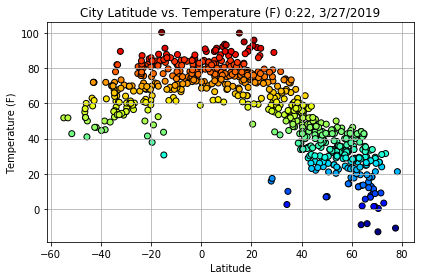

In [6]:
cmap = matplotlib.cm.get_cmap("jet")
normalize = matplotlib.colors.Normalize(vmin=min(max_temps), vmax=max(max_temps))
colors = [cmap(normalize(value)) for value in max_temps]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Max Temperature"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Temperature (F) {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

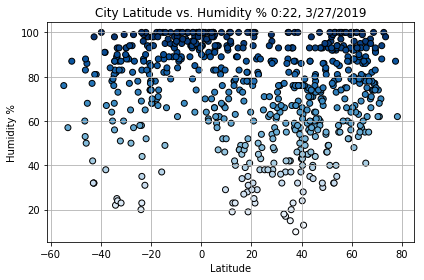

In [7]:
cmap = matplotlib.cm.get_cmap("Blues")
normalize = matplotlib.colors.Normalize(vmin=min(humidities), vmax=max(humidities))
colors = [cmap(normalize(value)) for value in humidities]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Humidity"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Humidity % {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

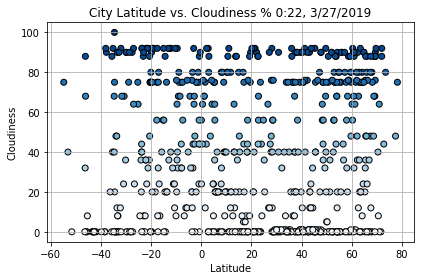

In [8]:
cmap = matplotlib.cm.get_cmap("Blues")
normalize = matplotlib.colors.Normalize(vmin=min(clouds), vmax=max(clouds))
colors = [cmap(normalize(value)) for value in clouds]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Cloudiness"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness % {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Cloudiness % Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

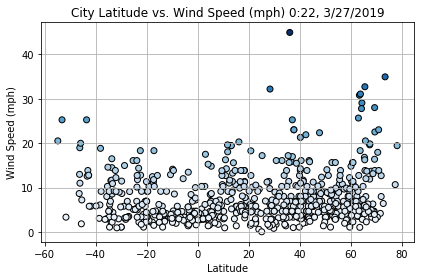

In [9]:
cmap = matplotlib.cm.get_cmap("Blues")
normalize = matplotlib.colors.Normalize(vmin=min(wind_speeds), vmax=max(wind_speeds))
colors = [cmap(normalize(value)) for value in wind_speeds]

plt.scatter(combined_weather_df["Latitude"], combined_weather_df["Wind Speed"], marker="o", facecolors=colors, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (mph) {time_now}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.tight_layout()

plt.savefig("Latitude vs. Wind Speed (mph) Plot.png")
plt.show()